In [15]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

from salishsea_tools import (
    nc_tools,
    viz_tools,
    tidetools,
)

In [2]:
%matplotlib inline

In [3]:
grid_t = nc.Dataset('/data/jpetrie/MEOPAR/NEMO-3.6-code/NEMOGCM/CONFIG/mygyre/EXP00/GYRE_5d_00010101_00011230_grid_T.nc')

In [26]:
X = grid_t.variables['nav_lon'][:, :]
X

array([[-71.51905823, -70.84500885, -70.17095947, -69.49691772,
        -68.82286835, -68.14881897, -67.47477722, -66.80072784,
        -66.12667847, -65.45262909, -64.77858734, -64.10453796,
        -63.4304924 , -62.75644302, -62.08239746, -61.40834808,
        -60.73430252, -60.06025314, -59.38620758, -58.71216202,
        -58.03811264, -57.36406708, -56.6900177 , -56.01597214,
        -55.34192657, -54.6678772 , -53.99383163, -53.31978226,
        -52.64573669, -51.97168732, -51.29764175, -50.62359619],
       [-72.1931076 , -71.51905823, -70.84500885, -70.17095947,
        -69.49691772, -68.82286835, -68.14881897, -67.47477722,
        -66.80072784, -66.12667847, -65.45262909, -64.77858734,
        -64.10453796, -63.4304924 , -62.75644302, -62.08239746,
        -61.40834808, -60.73430252, -60.06025314, -59.38620758,
        -58.71216202, -58.03811264, -57.36406708, -56.6900177 ,
        -56.01597214, -55.34192657, -54.6678772 , -53.99383163,
        -53.31978226, -52.64573669, -51

In [23]:
np.array(lats) == X

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, F

In [10]:
lats = grid_t.variables['nav_lat']
lons = grid_t.variables['nav_lon']
type(lats)

netCDF4._netCDF4.Variable

In [13]:
j_list = [1,2,6,4]
i_list = [3,9,2,12]

points = [lons[j_list[n],i_list[n]] for n in range(len(j_list))]

points

[-70.170959, -66.800728, -74.215248, -66.126678]

In [4]:
nc_tools.show_dimensions(grid_t)

<class 'netCDF4._netCDF4.Dimension'>: name = 'axis_nbounds', size = 2

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 32

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 22

<class 'netCDF4._netCDF4.Dimension'>: name = 'deptht', size = 31

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 72



In [5]:
nc_tools.show_variables(grid_t)

odict_keys(['nav_lat', 'nav_lon', 'deptht', 'deptht_bounds', 'votemper', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'vosaline', 'sosstsst', 'sosaline', 'sossheig', 'sowaflup', 'soshfldo', 'sosfldow', 'sohefldo', 'somxl010', 'somixhgt'])


In [7]:
nc_tools.show_dataset_attrs(grid_t)

file format: NETCDF4
name: GYRE_5d_00010101_00011230
description: ocean T grid variables
title: ocean T grid variables
Conventions: CF-1.5
production: An IPSL model
timeStamp: 2016-May-06 09:45:44 PDT


In [10]:
nc_tools.show_variable_attrs(grid_t, 'vosaline')

<class 'netCDF4._netCDF4.Variable'>
float32 vosaline(time_counter, deptht, y, x)
    standard_name: sea_water_practical_salinity
    long_name: salinity
    units: 1e-3
    online_operation: average
    interval_operation: 7200 s
    interval_write: 5 d
    cell_methods: time: mean (interval: 7200 s)
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered deptht nav_lon nav_lat
unlimited dimensions: time_counter
current shape = (72, 31, 22, 32)
filling on


In [100]:
lons = grid_t.variables['nav_lon']
lats = grid_t.variables['nav_lat']
temp = grid_t.variables['votemper']
salin = grid_t.variables['vosaline']
time_s = grid_t.variables['time_centered']
depth = grid_t.variables['deptht']

In [ ]:
time_s = time_s - time_s[0]
time_d = time_s/(60*60*24)

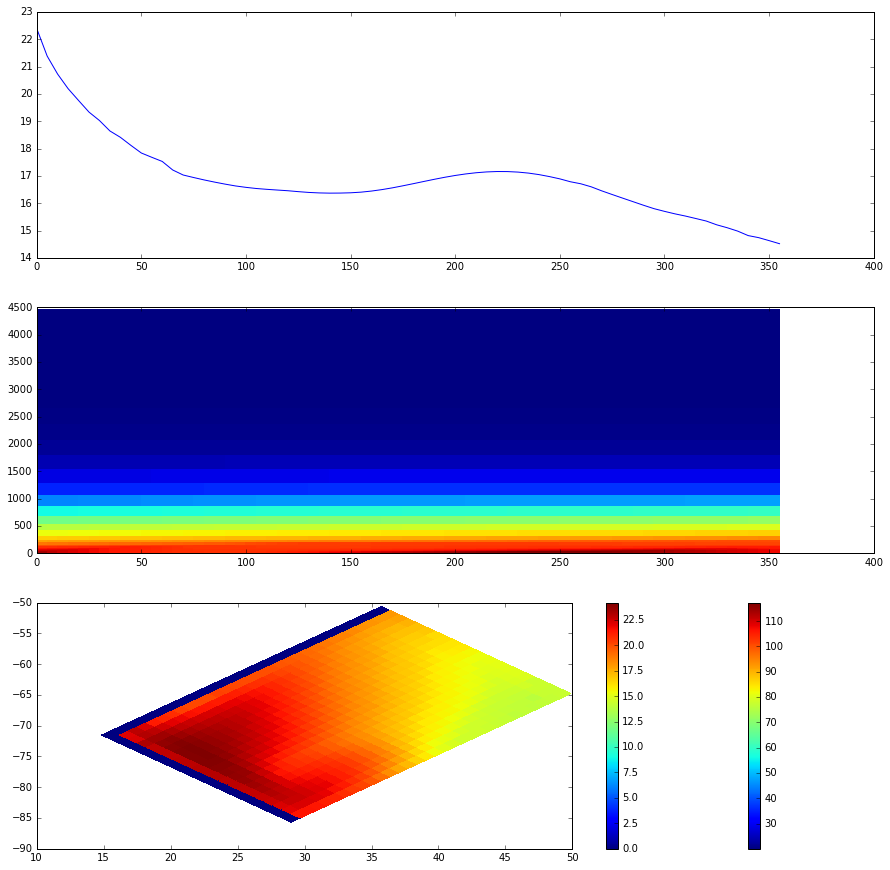

In [102]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
ax[0].plot(time_d, temp[:,0,20,20])

y,x = np.meshgrid(depth, time_d)
mesh1 = ax[1].pcolormesh(x.T, y.T,5*temp[:,:,10,10].T)

fig.colorbar(mesh1)


mesh2 = ax[2].pcolormesh(lats, lons,temp[71,0,:,:])
fig.colorbar(mesh2)



In [92]:
lats[1]

array([ 15.51905632,  16.19310379,  16.86715126,  17.54119873,
        18.2152462 ,  18.88929176,  19.56333923,  20.2373867 ,
        20.91143417,  21.58548164,  22.25952911,  22.93357468,
        23.60762215,  24.28166962,  24.95571709,  25.62976456,
        26.30381203,  26.97785759,  27.65190506,  28.32595253,
        29.        ,  29.67404747,  30.34809494,  31.02214241,
        31.69618797,  32.37023544,  33.04428482,  33.71833038,
        34.39237595,  35.06642532,  35.74047089,  36.41452026], dtype=float32)